In [49]:
 import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import RidgeCV

np.random.seed(42)

In [5]:
df = pd.read_csv('ObservedData.csv', 
                 index_col=[0])

In [6]:
print(df.shape)
df.head()

(156, 17)


time.index   tv.volume      tv.spend  search.clicks  search.imps  \
1          53           0  0.000000e+00              0            0   
2          54  1089276931  5.446534e+06         344738      4385017   
3          55           0  0.000000e+00         327228      4202279   
4          56   779008559  3.894953e+06         398409      5005803   
5          57           0  0.000000e+00         407746      5105357   

   search.matching.query.volume  search.query.volume  search.spend  \
1                       3925234             17454556           0.0   
2                       4385017             19495548      379211.8   
3                       4202279             18674739      359950.8   
4                       5005803             22248392      438249.9   
5                       5105357             22689299      448520.6   

    total.spend  brand.sales  competitor.sales    revenue        profit  \
1  0.000000e+00      1464929           8149405  117194320  1.171943e+08   
2  5.825746e+06      1824453           9169015  145956240  1.401305e+08   
3  3.599508e+05      1593647           8850791  127491760  1.271318e+08   
4  4.333203e+06      2109265          10658782  168741200  1.644080e+08   
5  4.485206e+05      1983664          11031917  158693120  1.582446e+08   

   tv.budget.index   tv.budget  search.budget.index  search.budget  
1                2  47500000.0                    2     12000000.0  
2                2  47500000.0                    2     12000000.0  
3                2  47500000.0                    2     12000000.0  
4                2  47500000.0                    2     12000000.0  
5                2  47500000.0                    2     12000000.0

In [7]:
df.dtypes

time.index                        int64
tv.volume                         int64
tv.spend                        float64
search.clicks                     int64
search.imps                       int64
search.matching.query.volume      int64
search.query.volume               int64
search.spend                    float64
total.spend                     float64
brand.sales                       int64
competitor.sales                  int64
revenue                           int64
profit                          float64
tv.budget.index                   int64
tv.budget                       float64
search.budget.index               int64
search.budget                   float64
dtype: object

# Data Exploration

In [8]:
df.describe()

time.index     tv.volume      tv.spend  search.clicks   search.imps  \
count  156.000000  1.560000e+02  1.560000e+02     156.000000  1.560000e+02   
mean   130.500000  1.730752e+08  8.653846e+05  315967.044872  4.207188e+06   
std     45.177428  2.557752e+08  1.278889e+06  200596.569821  2.545892e+06   
min     53.000000  0.000000e+00  0.000000e+00       0.000000  0.000000e+00   
25%     91.750000  0.000000e+00  0.000000e+00  193154.000000  2.711724e+06   
50%    130.500000  0.000000e+00  0.000000e+00  321727.500000  4.207117e+06   
75%    169.250000  3.030393e+08  1.515215e+06  437435.000000  5.718354e+06   
max    208.000000  1.089277e+09  5.446534e+06  821813.000000  1.029838e+07   

       search.matching.query.volume  search.query.volume   search.spend  \
count                  1.560000e+02         1.560000e+02     156.000000   
mean                   4.969196e+06         1.470570e+07  347563.749359   
std                    1.936581e+06         3.892745e+06  220656.226803   
min                    1.833205e+06         8.147354e+06       0.000000   
25%                    3.671494e+06         1.112414e+07  212469.400000   
50%                    4.628674e+06         1.438107e+07  353900.250000   
75%                    6.191451e+06         1.791146e+07  481178.500000   
max                    1.029838e+07         2.288058e+07  903994.300000   

        total.spend   brand.sales  competitor.sales       revenue  \
count  1.560000e+02  1.560000e+02      1.560000e+02  1.560000e+02   
mean   1.212948e+06  1.241617e+06      6.668882e+06  9.932939e+07   
std    1.305055e+06  4.003445e+05      2.105946e+06  3.202756e+07   
min    0.000000e+00  5.613870e+05      3.118096e+06  4.491096e+07   
25%    3.280817e+05  8.767255e+05      4.745538e+06  7.013804e+07   
50%    5.835538e+05  1.205290e+06      6.478346e+06  9.642320e+07   
75%    1.924798e+06  1.560262e+06      8.412969e+06  1.248209e+08   
max    5.825746e+06  2.148049e+06      1.118451e+07  1.718439e+08   

             profit  tv.budget.index     tv.budget  search.budget.index  \
count  1.560000e+02       156.000000  1.560000e+02           156.000000   
mean   9.811644e+07         3.000000  4.500000e+07             3.000000   
std    3.165117e+07         0.819126  2.280351e+06             0.819126   
min    4.489346e+07         2.000000  4.200000e+07             2.000000   
25%    6.919556e+07         2.000000  4.200000e+07             2.000000   
50%    9.546933e+07         3.000000  4.550000e+07             3.000000   
75%    1.225360e+08         4.000000  4.750000e+07             4.000000   
max    1.692871e+08         4.000000  4.750000e+07             4.000000   

       search.budget  
count   1.560000e+02  
mean    1.800000e+07  
std     4.914757e+06  
min     1.200000e+07  
25%     1.200000e+07  
50%     1.800000e+07  
75%     2.400000e+07  
max     2.400000e+07

In [9]:
missing_data = df.isnull().sum()
missing_data

time.index                      0
tv.volume                       0
tv.spend                        0
search.clicks                   0
search.imps                     0
search.matching.query.volume    0
search.query.volume             0
search.spend                    0
total.spend                     0
brand.sales                     0
competitor.sales                0
revenue                         0
profit                          0
tv.budget.index                 0
tv.budget                       0
search.budget.index             0
search.budget                   0
dtype: int64

In [10]:
df.nunique()

time.index                      156
tv.volume                        74
tv.spend                         74
search.clicks                   133
search.imps                     133
search.matching.query.volume    156
search.query.volume             156
search.spend                    133
total.spend                     144
brand.sales                     156
competitor.sales                156
revenue                         156
profit                          156
tv.budget.index                   3
tv.budget                         3
search.budget.index               3
search.budget                     3
dtype: int64

In [11]:
#distribution of target variable

/Users/Anushka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

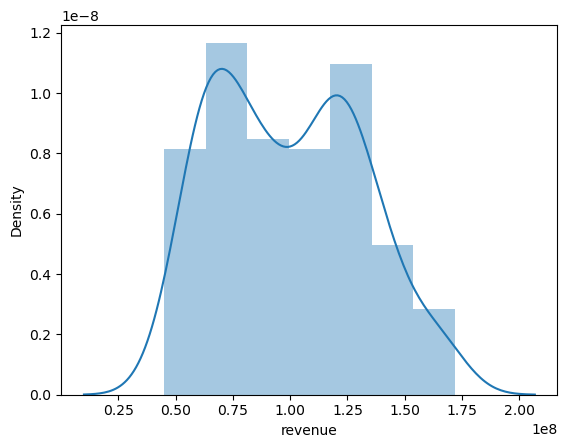

In [12]:
sns.distplot(df['revenue'])

/Users/Anushka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

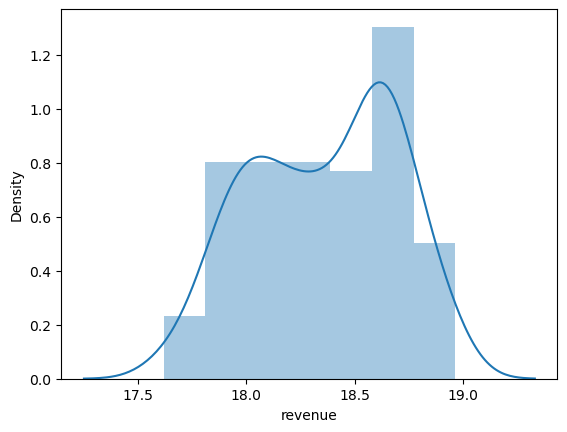

In [13]:
sns.distplot(df['revenue'].apply(np.log))

/Users/Anushka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

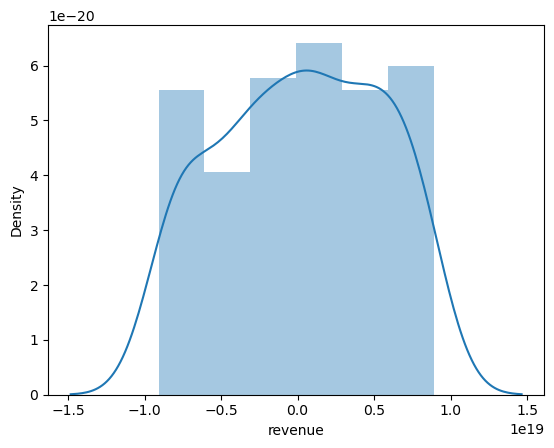

In [14]:
sns.distplot(df['revenue']**3)

In [15]:
# Check correlation between variables

sales_corr = round(df.corr(),2)
sns.set(font_scale=5)
plt.subplots(figsize=(100,85))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

<AxesSubplot:>

# Select features and target variable for models

In [16]:

sale_spend = df.loc[:, df.columns.intersection(['tv.spend', 'search.spend','revenue'])]

In [17]:
print(sale_spend.shape)
sale_spend.head()

(156, 3)


tv.spend  search.spend    revenue
1  0.000000e+00           0.0  117194320
2  5.446534e+06      379211.8  145956240
3  0.000000e+00      359950.8  127491760
4  3.894953e+06      438249.9  168741200
5  0.000000e+00      448520.6  158693120

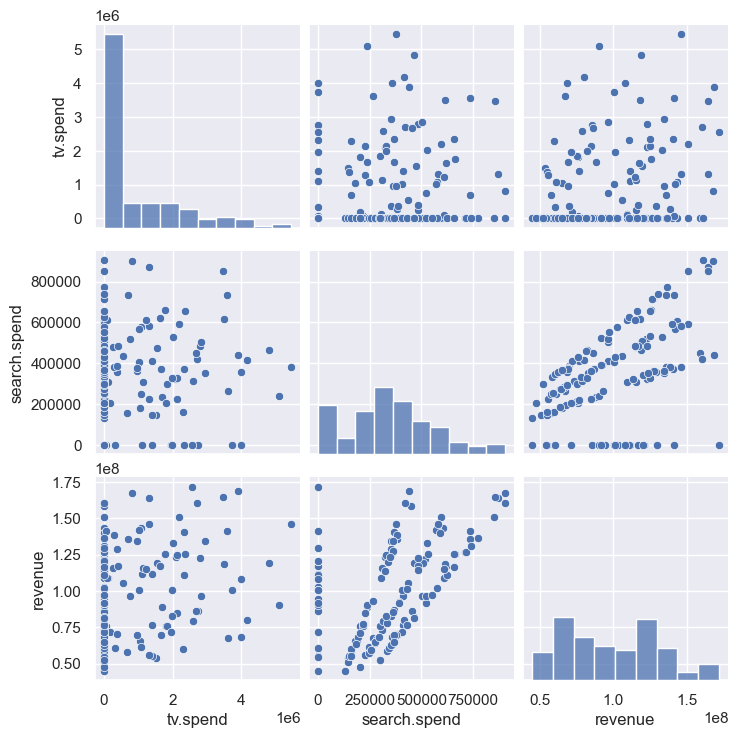

In [18]:
sns.set(font_scale=1)

sns.pairplot(sale_spend)

# Feature Engineering


Some new features will be created to account for seasonality and other trends:

tv.spend, search.spend, and revenue are shifted 52 weeks to create one year lag variables (_lag1y) for seasonality.
Revenue will also be shifted one week (_lag1w) and three months (lag3m) to explore effects of delayed purchase after interacting with an advertisement.
To explore advertising trends, rolling averages for both tv.spend and search.spend are calculated for one week (_p1w), three months (_p3m) , and one year (_p1y).

In [19]:
sale_spend = pd.concat([sale_spend, sale_spend.shift(52).add_suffix('_lag1y')], axis=1)

sale_spend['revenue_lag1w'] = sale_spend['revenue'].shift()
sale_spend['revenue_lag3m'] = sale_spend['revenue'].shift(13)

In [20]:
# Create rolling average variable for 1y, 3m, and 1w for all channel spend 

sale_spend = pd.concat([sale_spend, sale_spend.rolling(1).mean().add_suffix('_p1w'), 
                        sale_spend.rolling(13).mean().add_suffix('_p3m'), 
                        sale_spend.rolling(52).mean().add_suffix('_p1y')], axis=1)

In [25]:
print(sale_spend.shape)
sale_spend.head(53)

(156, 32)


tv.spend  search.spend    revenue  tv.spend_lag1y  search.spend_lag1y  \
1   0.000000e+00           0.0  117194320             NaN                 NaN   
2   5.446534e+06      379211.8  145956240             NaN                 NaN   
3   0.000000e+00      359950.8  127491760             NaN                 NaN   
4   3.894953e+06      438249.9  168741200             NaN                 NaN   
5   0.000000e+00      448520.6  158693120             NaN                 NaN   
6   2.696375e+06      419876.6  160434080             NaN                 NaN   
7   0.000000e+00      360494.2  127049920             NaN                 NaN   
8   2.103286e+06      324074.3  123078640             NaN                 NaN   
9   0.000000e+00      352353.1  124815680             NaN                 NaN   
10  2.334387e+06      368975.2  140657760             NaN                 NaN   
11  3.805899e+05      354547.6  128814880             NaN                 NaN   
12  0.000000e+00      339739.4  119972080             NaN                 NaN   
13  0.000000e+00           0.0  109113040             NaN                 NaN   
14  1.386525e+06           0.0  111731040             NaN                 NaN   
15  0.000000e+00      264578.6   93224240             NaN                 NaN   
16  1.680032e+06      235155.8   88649280             NaN                 NaN   
17  0.000000e+00      215070.9   75558400             NaN                 NaN   
18  6.278524e+04      215199.6   76050640             NaN                 NaN   
19  1.808795e+05      202414.3   72076720             NaN                 NaN   
20  0.000000e+00      186429.1   65599600             NaN                 NaN   
21  6.812715e+05      157539.8   57654880             NaN                 NaN   
22  0.000000e+00      129097.1   45022560             NaN                 NaN   
23  1.049348e+06      177419.0   65490480             NaN                 NaN   
24  0.000000e+00      195209.3   68182720             NaN                 NaN   
25  1.502104e+06      144652.2   53769600             NaN                 NaN   
26  0.000000e+00           0.0   44910960             NaN                 NaN   
27  0.000000e+00           0.0   60062240             NaN                 NaN   
28  2.296453e+06      159272.3   59888320             NaN                 NaN   
29  0.000000e+00      145673.0   51032720             NaN                 NaN   
30  1.384656e+06      147929.1   55080000             NaN                 NaN   
31  0.000000e+00      158638.7   55363440             NaN                 NaN   
32  0.000000e+00      182579.1   63772480             NaN                 NaN   
33  1.803295e+06      203177.7   76041440             NaN                 NaN   
34  0.000000e+00      215356.9   75664000             NaN                 NaN   
35  2.128655e+06      224610.1   84963440             NaN                 NaN   
36  0.000000e+00      203155.7   71265680             NaN                 NaN   
37  5.084808e+06      236313.0   90592880             NaN                 NaN   
38  0.000000e+00      218754.8   77027680             NaN                 NaN   
39  2.748481e+06           0.0   85923600             NaN                 NaN   
40  1.098279e+06           0.0  111486400             NaN                 NaN   
41  1.276588e+05      306425.9  109101120             NaN                 NaN   
42  1.141818e+06      309411.3  115684320             NaN                 NaN   
43  0.000000e+00      264072.6   93143920             NaN                 NaN   
44  0.000000e+00      321459.6  113742880             NaN                 NaN   
45  2.126681e+06      327966.1  124836720             NaN                 NaN   
46  0.000000e+00      383060.7  135533680             NaN                 NaN   
47  2.931855e+06      351476.4  134609120             NaN                 NaN   
48  0.000000e+00      360813.2  127534960             NaN                 NaN   
49  0.000000e+00      349498.6  1236013

In [22]:
sale_spend.dtypes

tv.spend                  float64
search.spend              float64
revenue                     int64
tv.spend_lag1y            float64
search.spend_lag1y        float64
revenue_lag1y             float64
revenue_lag1w             float64
revenue_lag3m             float64
tv.spend_p1w              float64
search.spend_p1w          float64
revenue_p1w               float64
tv.spend_lag1y_p1w        float64
search.spend_lag1y_p1w    float64
revenue_lag1y_p1w         float64
revenue_lag1w_p1w         float64
revenue_lag3m_p1w         float64
tv.spend_p3m              float64
search.spend_p3m          float64
revenue_p3m               float64
tv.spend_lag1y_p3m        float64
search.spend_lag1y_p3m    float64
revenue_lag1y_p3m         float64
revenue_lag1w_p3m         float64
revenue_lag3m_p3m         float64
tv.spend_p1y              float64
search.spend_p1y          float64
revenue_p1y               float64
tv.spend_lag1y_p1y        float64
search.spend_lag1y_p1y    float64
revenue_lag1y_

In [26]:
# Drop extra columns generated from column shift and concatenation

sale_spend = sale_spend.loc[:, ~sale_spend.columns.duplicated()]
sale_spend.drop(['revenue_p1w', 'revenue_p3m', 'revenue_p1y'], axis=1, inplace=True)
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1y')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p1y')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p1y')]

In [27]:
print(sale_spend.shape)
sale_spend.head()

(156, 14)


tv.spend  search.spend    revenue  tv.spend_lag1y  search.spend_lag1y  \
1  0.000000e+00           0.0  117194320             NaN                 NaN   
2  5.446534e+06      379211.8  145956240             NaN                 NaN   
3  0.000000e+00      359950.8  127491760             NaN                 NaN   
4  3.894953e+06      438249.9  168741200             NaN                 NaN   
5  0.000000e+00      448520.6  158693120             NaN                 NaN   

   revenue_lag1y  revenue_lag1w  revenue_lag3m  tv.spend_p1w  \
1            NaN            NaN            NaN  0.000000e+00   
2            NaN    117194320.0            NaN  5.446534e+06   
3            NaN    145956240.0            NaN  0.000000e+00   
4            NaN    127491760.0            NaN  3.894953e+06   
5            NaN    168741200.0            NaN  0.000000e+00   

   search.spend_p1w  tv.spend_p3m  search.spend_p3m  tv.spend_p1y  \
1               0.0           NaN               NaN           NaN   
2          379211.8           NaN               NaN           NaN   
3          359950.8           NaN               NaN           NaN   
4          438249.9           NaN               NaN           NaN   
5          448520.6           NaN               NaN           NaN   

   search.spend_p1y  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN

In [28]:
missing_data = sale_spend.isnull().sum()
missing_data

tv.spend               0
search.spend           0
revenue                0
tv.spend_lag1y        52
search.spend_lag1y    52
revenue_lag1y         52
revenue_lag1w          1
revenue_lag3m         13
tv.spend_p1w           0
search.spend_p1w       0
tv.spend_p3m          12
search.spend_p3m      12
tv.spend_p1y          51
search.spend_p1y      51
dtype: int64

In [29]:
# Drop nulls

sale_spend = sale_spend.dropna()
sale_spend.shape

(104, 14)

In [30]:

sales_corr = round(sale_spend.corr(),2)
sns.set(font_scale=5)
plt.subplots(figsize=(100,85))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

<AxesSubplot:>

In [31]:
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_p1w')]

In [32]:
print(sale_spend.shape)
sale_spend.head()

(104, 12)


tv.spend  search.spend    revenue  tv.spend_lag1y  search.spend_lag1y  \
53  2.556818e+06           0.0  171843920    0.000000e+00                 0.0   
54  0.000000e+00      606416.8  143530400    5.446534e+06            379211.8   
55  1.068467e+06      575487.0  143586160    0.000000e+00            359950.8   
56  0.000000e+00      516824.0  122031200    3.894953e+06            438249.9   
57  1.023443e+06      569357.8  142010400    0.000000e+00            448520.6   

    revenue_lag1y  revenue_lag1w  revenue_lag3m   tv.spend_p3m  \
53    117194320.0    120768960.0    111486400.0  777932.265331   
54    145956240.0    171843920.0    109101120.0  768112.356477   
55    127491760.0    143530400.0    115684320.0  762469.913254   
56    168741200.0    143586160.0     93143920.0  762469.913254   
57    158693120.0    122031200.0    113742880.0  841196.277212   

    search.spend_p3m   tv.spend_p1y  search.spend_p1y  
53     285979.946154  962631.108189     232345.363462  
54     309056.169231  857890.068903     236714.690385  
55     329523.530769  878437.501642     240859.617308  
56     348965.946154  803534.552599     242370.657692  
57     368035.038462  823216.143588     244694.450000

# Prepare data for pipeline

In [33]:
y = sale_spend['revenue']
X = sale_spend.loc[:, sale_spend.columns != 'revenue']

In [34]:
# For each X, calculate VIF and save in dataframe

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
X = sale_spend.loc[:, sale_spend.columns != 'revenue']

vif.round(1)

Features  VIF Factor
0             tv.spend         1.7
1         search.spend        74.7
2       tv.spend_lag1y         1.7
3   search.spend_lag1y        76.6
4        revenue_lag1y        79.1
5        revenue_lag1w       102.0
6        revenue_lag3m        43.5
7         tv.spend_p3m        23.0
8     search.spend_p3m        99.3
9         tv.spend_p1y       108.4
10    search.spend_p1y        68.1

In [36]:
# Create decision tree to help determine feature importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

<AxesSubplot:>

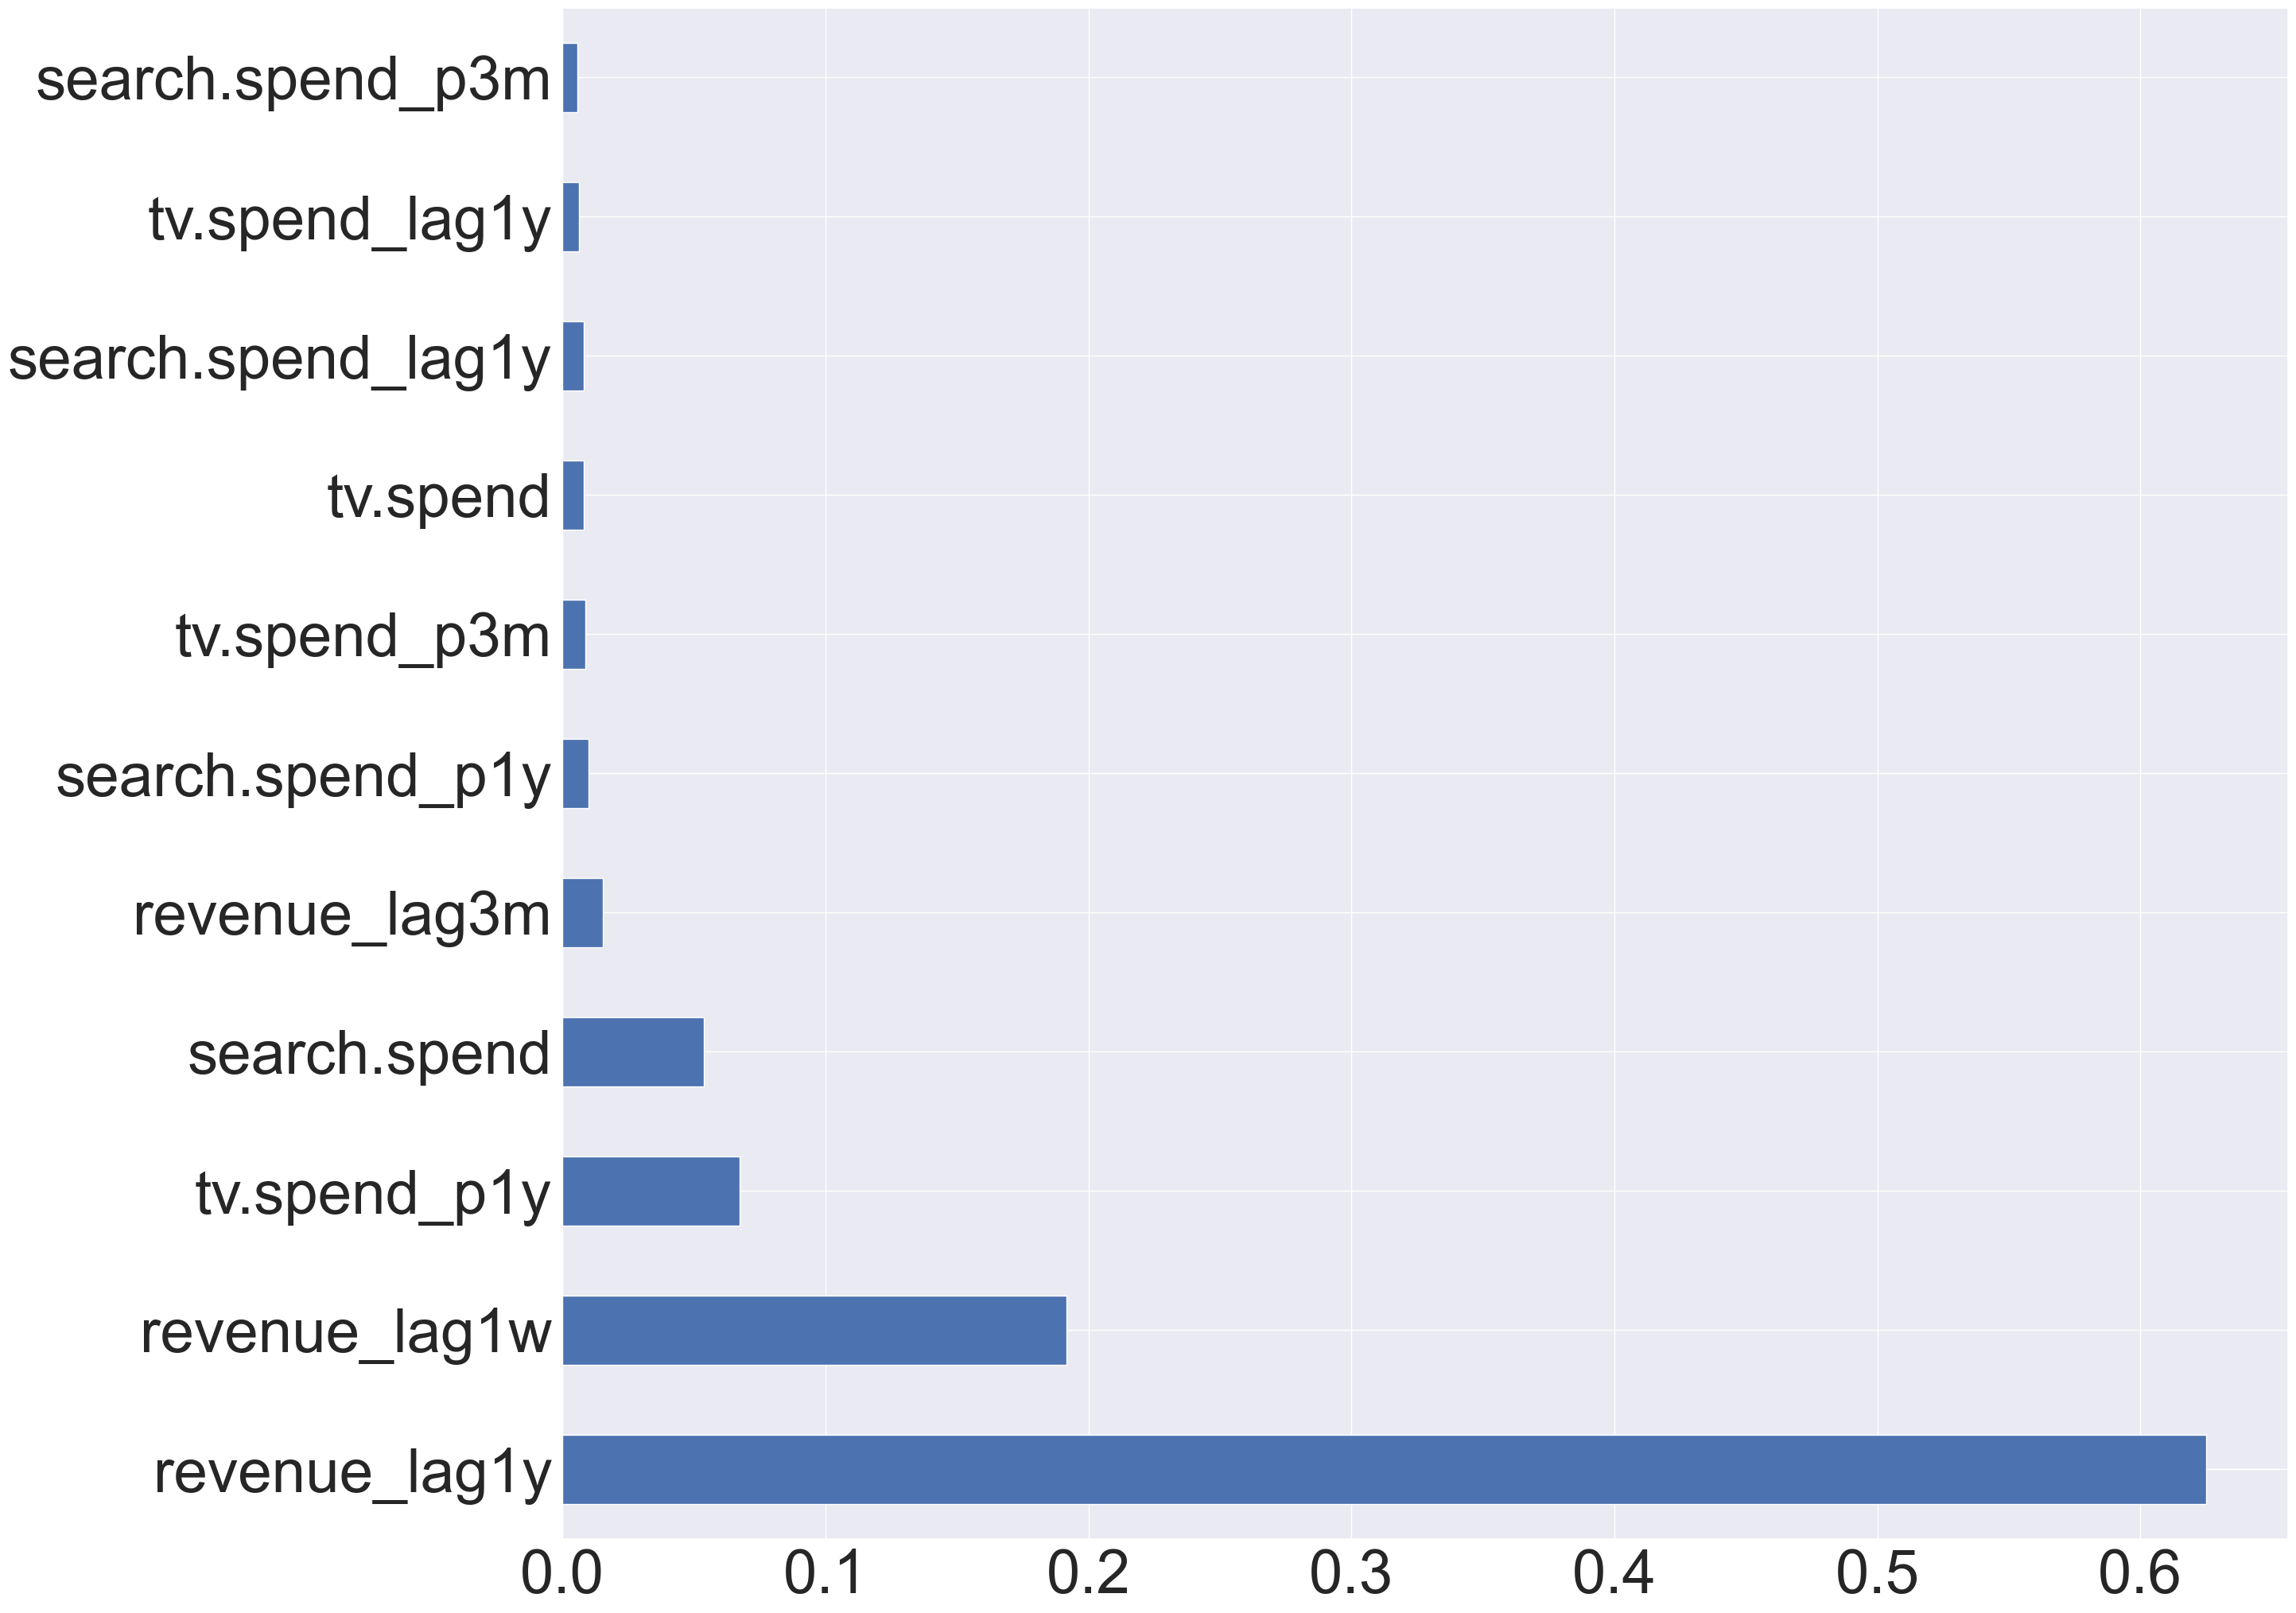

In [43]:

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(28,25))

In [44]:

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(72, 11) (32, 11)
(72,) (32,)


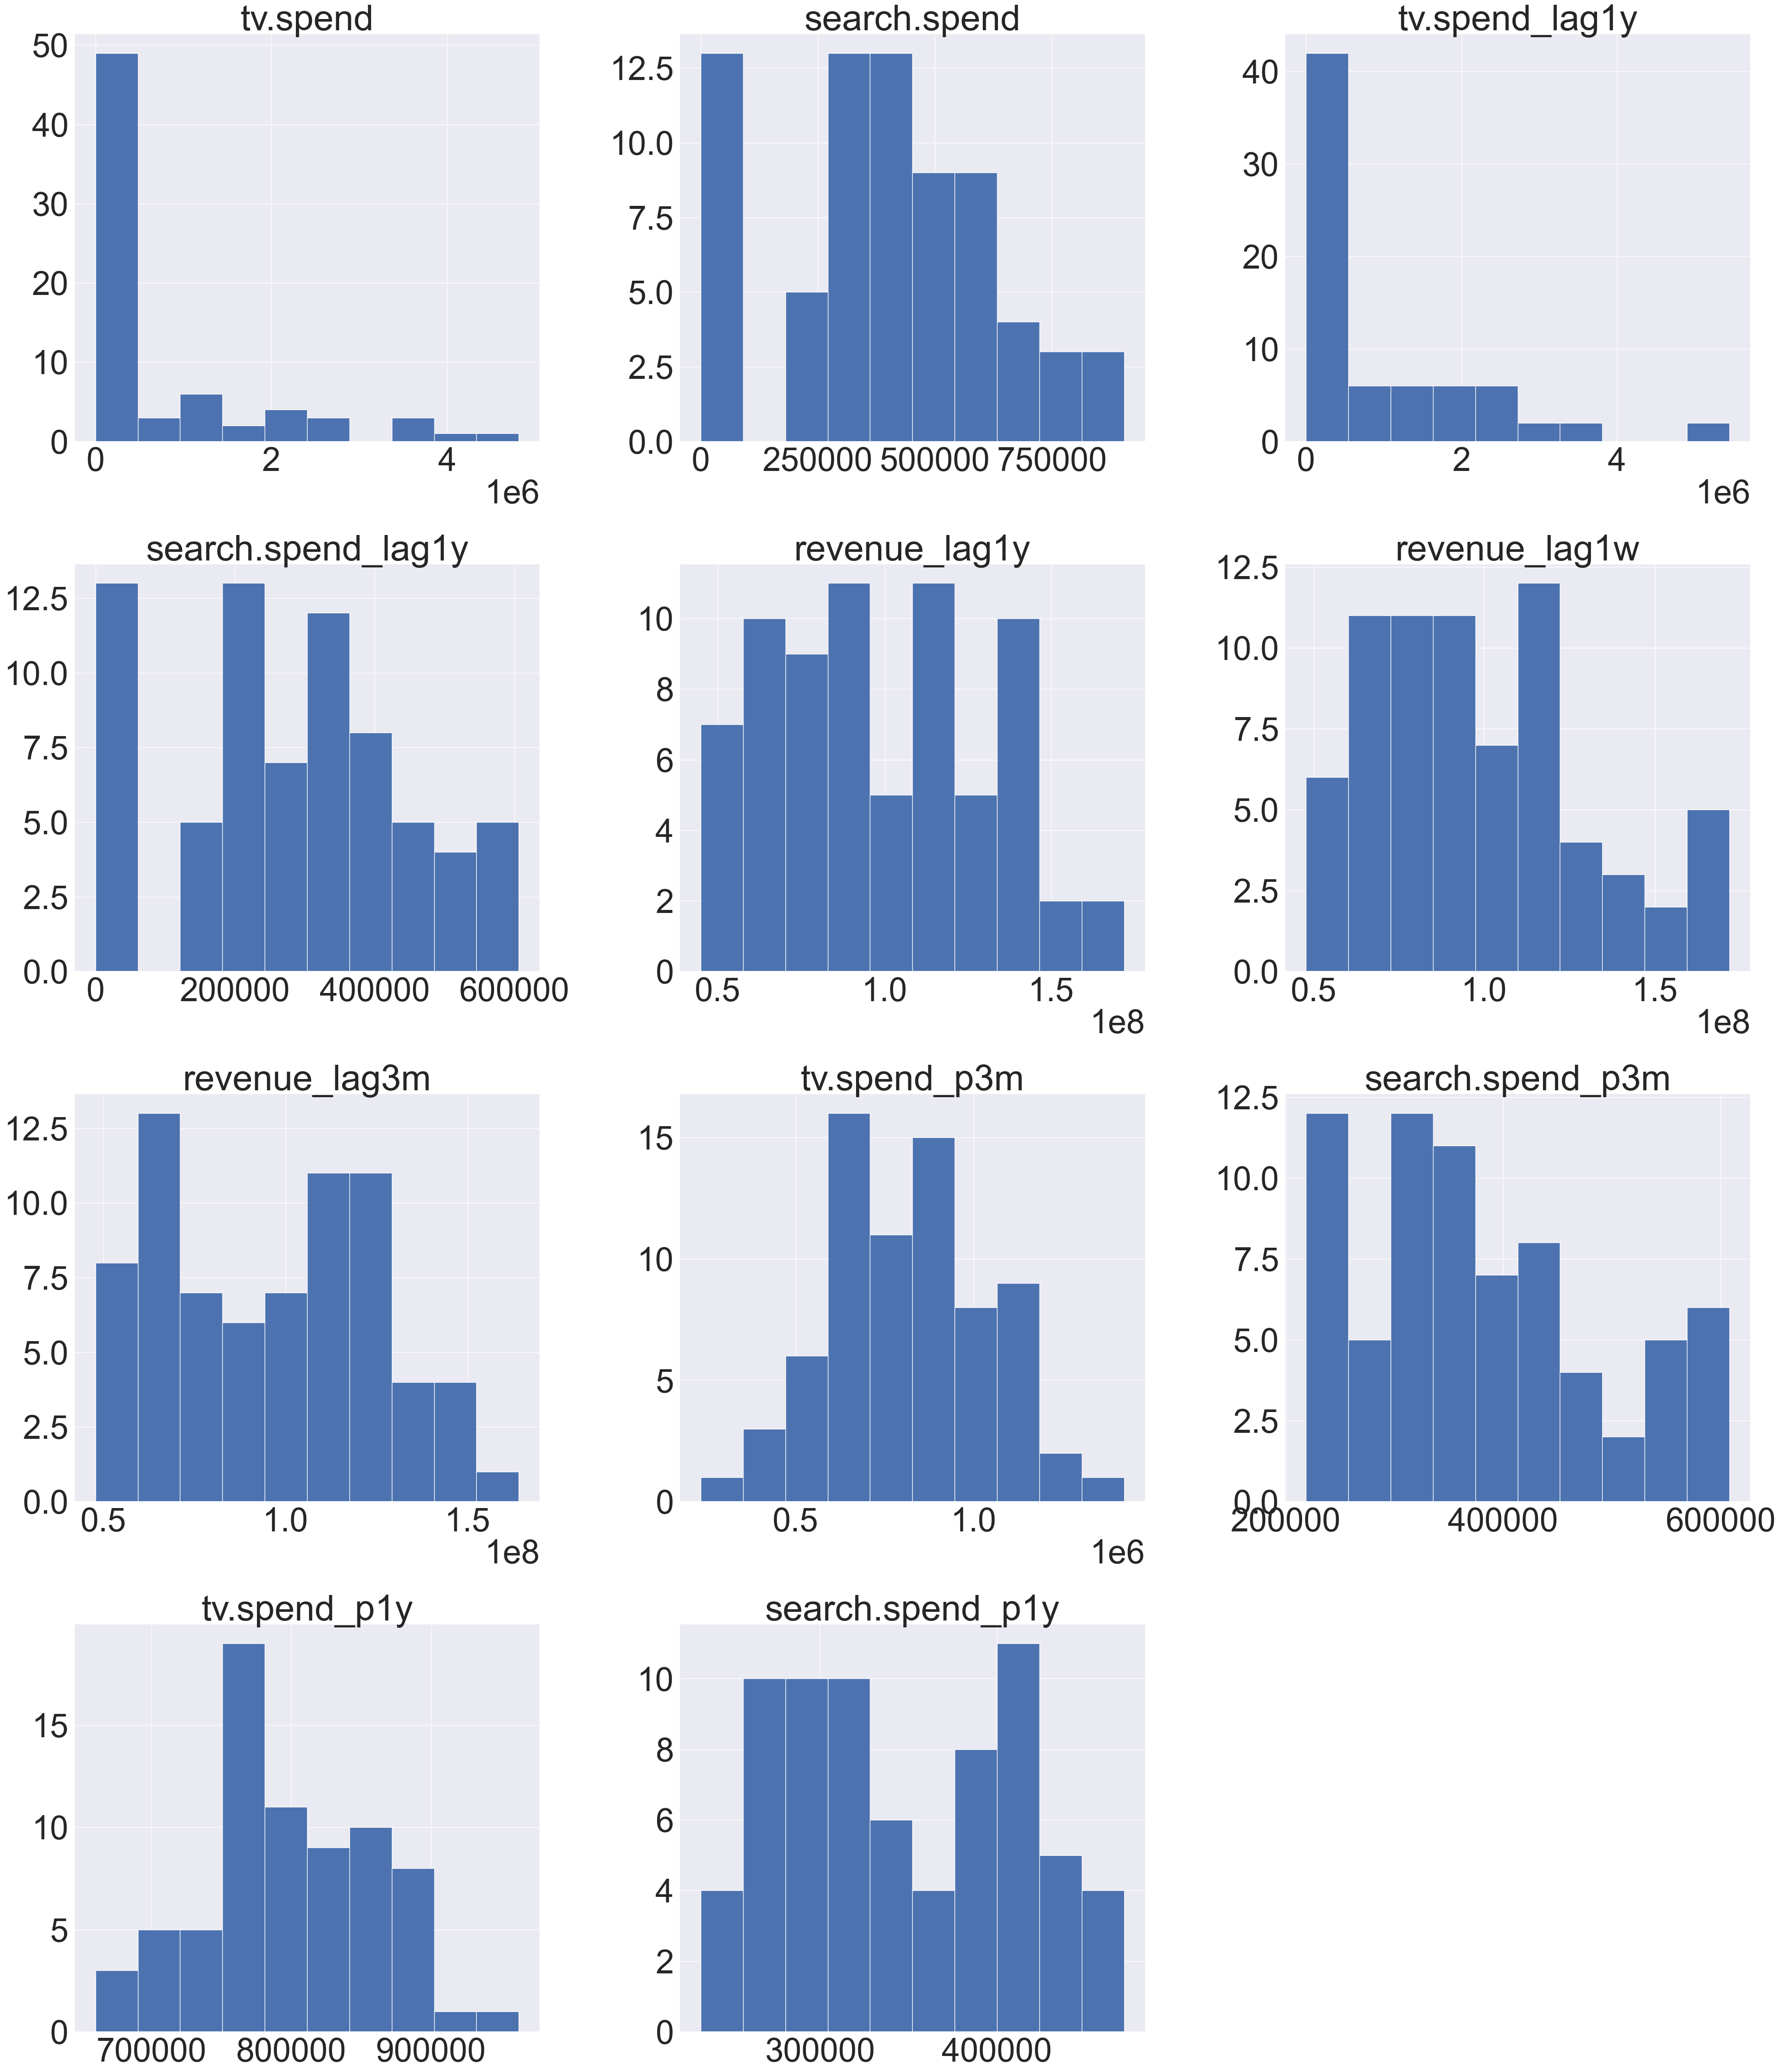

In [46]:
X_train.hist(figsize=(50, 60))
plt.show()

In [47]:
scaler = StandardScaler()
distributor = PowerTransformer(method='yeo-johnson', standardize=False)

pipeline = Pipeline(steps=[
    ('scaler', scaler),    #scale numbers to same magnitude before normalizing distribution
    ('pt', distributor)    #transform numbers to more gaussian-like distribution
])

In [52]:
# Fit_transform train data with preprocessor

train_x = pipeline.fit_transform(X_train)

print(train_x.shape)
train_x

(72, 11)


array([[ 4.87392737e-01, -1.55209722e+00, -1.12248154e+00,
        -1.52469444e+00, -2.62029728e-01, -6.24433436e-01,
        -1.28741298e+00,  1.26511958e+00, -5.58835853e-01,
         8.53340370e-01,  1.09196191e+00],
       [-1.05320416e+00, -1.67974490e-01, -1.12248154e+00,
         4.59933776e-01, -5.15037191e-01, -1.07261570e+00,
         1.01082512e+00,  5.81080627e-01,  7.16525961e-01,
        -5.95054320e-01,  6.67787162e-01],
       [ 1.55887243e-03,  1.50872809e+00, -1.12248154e+00,
         2.00232105e+00,  1.26886383e+00,  6.18856293e-01,
         1.62545189e-01, -1.99713070e-01,  4.63160692e-01,
        -4.22060250e-01, -6.50645911e-02],
       [-1.05320416e+00, -5.85756127e-01,  6.22257948e-01,
        -6.53231231e-01, -1.31506997e+00, -1.02519379e+00,
        -4.30888130e-01, -6.77778115e-01, -1.37055327e+00,
         1.22839850e+00, -9.09079696e-01],
       [-1.05320416e+00, -8.53380904e-02, -8.21772210e-01,
        -4.11829884e-01, -8.83425154e-01, -2.19195340e-01,
  

In [51]:
import warnings
np.warnings = warnings

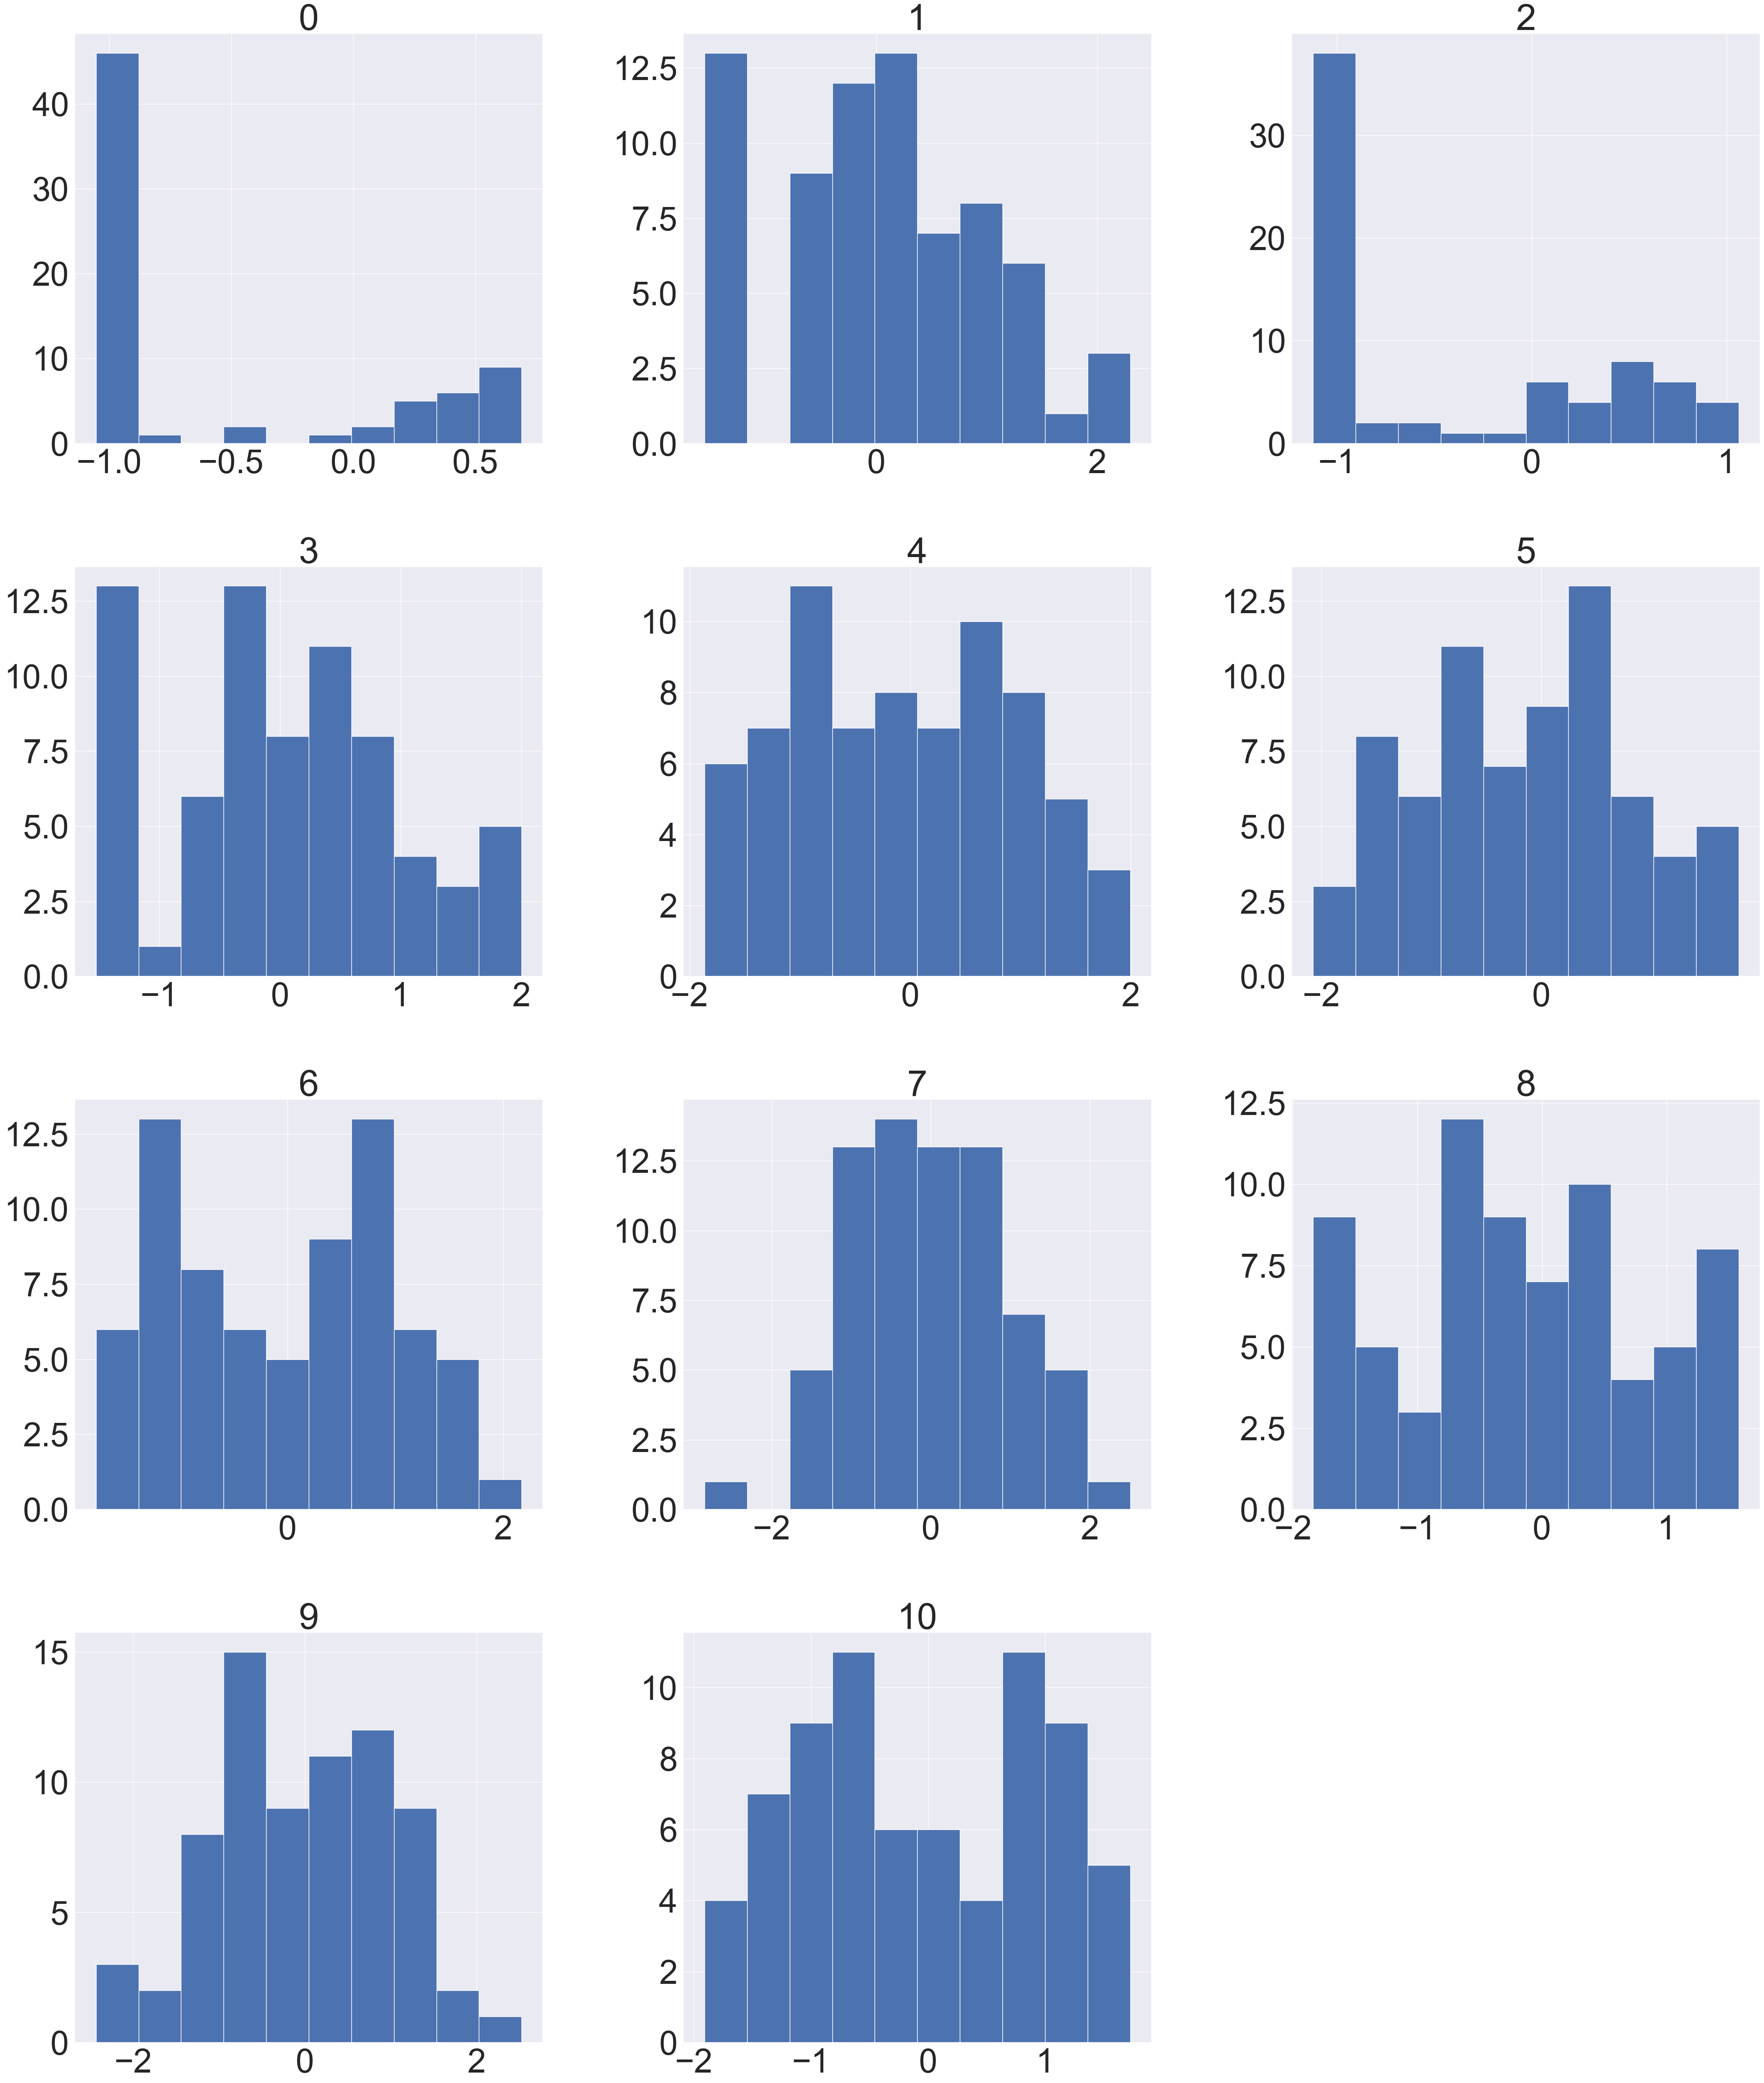

In [54]:

train_x_df = pd.DataFrame(train_x)

train_x_df.hist(figsize=(50,60))
plt.show()

In [55]:
test_x = pipeline.transform(X_test)

print(test_x.shape)
test_x

(32, 11)


array([[ 0.48558952, -1.55209722, -1.12248154, -1.52469444, -1.30880709,
        -1.73602222,  0.16221891, -0.67777811, -1.26485974,  1.88688113,
        -0.93768453],
       [-1.05320416,  1.5306279 , -1.12248154,  0.79349171, -0.07925793,
         0.54116514,  1.76711165, -2.03538719,  1.44615777, -0.70529426,
         0.39976356],
       [ 0.24197809,  0.80208576, -1.12248154,  0.49936722,  0.83605622,
         1.18606705,  0.65730697, -0.24120209, -0.50506739,  1.28376029,
        -1.75396904],
       [ 0.63530567,  0.98101147, -1.12248154,  1.39368662,  0.61200234,
         0.88025337,  0.96743575, -0.71255798,  1.48414932,  0.42099912,
         0.42937521],
       [-1.05320416, -0.08833085,  0.69025976,  0.2152267 , -0.64014999,
        -1.09985228, -0.68886338, -1.33842907, -0.80414394, -1.34891902,
         0.97748629],
       [ 0.52121819,  0.8821448 , -1.12248154,  0.43739544,  0.72802527,
         0.94470964, -0.47873213,  0.23725528, -0.04129497,  0.13407045,
        -0.213

In [56]:

mean_value = np.mean(y_train)

mean_value

98667211.1111111

In [57]:
base_pred = np.repeat(mean_value, len(y_test))

base_pred

array([98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111])

In [58]:

base_mse = mean_squared_error(y_test, base_pred)

base_rmse = np.sqrt(base_mse)
base_mape = mean_absolute_percentage_error(y_test, base_pred)
base_r_sq = r2_score(y_test, base_pred)

print('Baseline RMSE: {}' .format(base_rmse))
print('Baseline MAPE: {}' .format(base_mape))
print('Baseline R2: {}' .format(base_r_sq))

Baseline RMSE: 32350200.101869214
Baseline MAPE: 0.3080689065045069
Baseline R2: -0.005206233767016011


# Linear Regression

In [59]:
y_all = df['revenue']
x_all = df.loc[:, df.columns != 'revenue']


x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=.3, random_state=0)

In [60]:
lr_model = LinearRegression()

lr_model.fit(x_train_all, y_train_all)

LinearRegression()

In [61]:
#Train RMSE

reg_train_pred = lr_model.predict(x_train_all)

lr_train_mse = mean_squared_error(y_train_all, reg_train_pred)
lr_train_rmse = np.sqrt(mean_squared_error (y_train_all, reg_train_pred))

lr_train_mape = mean_absolute_percentage_error(y_train_all, reg_train_pred)
lr_train_r_sq = r2_score(y_train_all, reg_train_pred)

print('Train RMSE: {}' .format(lr_train_rmse))
print('Train MAPE: {}' .format(lr_train_mape))
print('Train R2: {}' .format(lr_train_r_sq))

Train RMSE: 2.23506025292304e-07
Train MAPE: 1.872995524129572e-15
Train R2: 1.0


In [62]:
#Test RMSE

reg_test_pred = lr_model.predict(x_test_all)

lr_test_mse = mean_squared_error (y_test_all, reg_test_pred)

lr_test_rmse = np.sqrt(mean_squared_error (y_test_all, reg_test_pred))
lr_test_mape = mean_absolute_percentage_error(y_test_all, reg_test_pred)
lr_test_r_sq = r2_score(y_test_all, reg_test_pred)


print('Test RMSE: {}' .format(lr_test_rmse))
print('Test MAPE: {}' .format(lr_test_mape))
print('Test R2: {}' .format(lr_test_r_sq))

Test RMSE: 2.0604995021916332e-07
Test MAPE: 1.863693793824024e-15
Test R2: 1.0


# Linear Regression Simplified

In [63]:
# Create train/ test variables using only two features: tv.spend and search.spend

y_simple = df['revenue']
x_simple = df[['tv.spend','search.spend']]


x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, test_size=.3, random_state=0)

In [64]:

lr_model.fit(x_train_simple, y_train_simple)

LinearRegression()

In [65]:
reg_train_pred = lr_model.predict(x_train_simple)

lrsimp_train_mse = mean_squared_error(y_train_simple, reg_train_pred)
lrsimp_train_rmse = np.sqrt(mean_squared_error (y_train_simple, reg_train_pred))
lrsimp_train_mape = mean_absolute_percentage_error(y_train_simple, reg_train_pred)
lrsimp_train_r_sq = r2_score(y_train_simple, reg_train_pred)

print('Train RMSE: {}' .format(lrsimp_train_rmse))
print('Train MAPE: {}' .format(lrsimp_train_mape))
print('Train R2: {}' .format(lrsimp_train_r_sq))

Train RMSE: 28011177.317391858
Train MAPE: 0.2729072708904673
Train R2: 0.2545513260172919


In [66]:
#Test RMSE

reg_test_pred = lr_model.predict(x_test_simple)

lrsimp_test_mse = mean_squared_error(y_test_simple, reg_test_pred)
lrsimp_test_rmse = np.sqrt(mean_squared_error (y_test_simple, reg_test_pred))
lrsimp_test_mape = mean_absolute_percentage_error(y_test_simple, reg_test_pred)
lrsimp_test_r_sq = r2_score(y_test_simple, reg_test_pred)

print('test RMSE: {}' .format(lrsimp_test_rmse))
print('test MAPE: {}' .format(lrsimp_test_mape))
print('test R2: {}' .format(lrsimp_test_r_sq))

test RMSE: 23300652.96250886
test MAPE: 0.24155755186895225
test R2: 0.4233070244876658


# Linear Regression with Lag variables

In [67]:
lr_lagmodel = LinearRegression()

lr_lagmodel.fit(train_x, y_train)

LinearRegression()

In [68]:
#Train RMSE

reg_train_pred = lr_lagmodel.predict(train_x)

lrlag_train_mse = mean_squared_error(y_train, reg_train_pred)
lrlag_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
lrlag_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
lrlag_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(lrlag_train_rmse))
print('Train MAPE: {}' .format(lrlag_train_mape))
print('Train R2: {}' .format(lrlag_train_r_sq))

Train RMSE: 7582032.871769882
Train MAPE: 0.05150584208141892
Train R2: 0.9391150677289073


In [69]:
#Test RMSE

reg_test_pred = lr_lagmodel.predict(test_x)

lrlag_test_mse = mean_squared_error (y_test, reg_test_pred)
lrlag_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
lrlag_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
lrlag_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(lrlag_test_rmse))
print('Test MAPE: {}' .format(lrlag_test_mape))
print('Test R2: {}' .format(lrlag_test_r_sq))

Test RMSE: 7071079.57040376
Test MAPE: 0.0541659818144474
Test R2: 0.9519744132825303


# Polynomial Regression

In [70]:

poly_features = PolynomialFeatures(degree=3).fit(train_x)

# Transform train and test features using fit transformer
train_x_poly = poly_features.transform(train_x)

test_x_poly = poly_features.transform(test_x)

In [71]:
pol_lin_reg = LinearRegression()

pol_lin_reg.fit(train_x_poly, y_train)

LinearRegression()

In [72]:
#Train RMSE

reg_train_pred = pol_lin_reg.predict(train_x_poly)

poly_train_mse = mean_squared_error(y_train, reg_train_pred)
poly_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
poly_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
poly_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(poly_train_rmse))
print('Train MAPE: {}' .format(poly_train_mape))
print('Train R2: {}' .format(poly_train_r_sq))

Train RMSE: 7.455235755514168e-08
Train MAPE: 6.117757816086674e-16
Train R2: 1.0


In [73]:
#Test RMSE

reg_test_pred = pol_lin_reg.predict(test_x_poly)

poly_test_mse = mean_squared_error (y_test, reg_test_pred)
poly_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
poly_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
poly_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(poly_test_rmse))
print('Test MAPE: {}' .format(poly_test_mape))
print('Test R2: {}' .format(poly_test_r_sq))

Test RMSE: 16987432.299700826
Test MAPE: 0.13347646252671141
Test R2: 0.7228233073054551


# Lasso Regression

In [74]:
# Lasso Regression to help with multicolinearity of variables

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

lasso_reg = LassoCV(alphas=arange(0.0001,1,0.001), cv=cv, n_jobs=-1, max_iter=5000)

lasso_reg.fit(train_x, y_train)

LassoCV(alphas=array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.210e-0...
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        max_iter=5000, n_jobs=-1)

In [75]:
# See how many iterations completed before stopping

print("Convergence occured at {} iterations." .format(lasso_reg.n_iter_))

# See alpha used

print('An alpha of {} was used.' .format(lasso_reg.alpha_))

Convergence occured at 357 iterations.
An alpha of 0.9991 was used.


In [76]:
#Train RMSE

reg_train_pred = lasso_reg.predict(train_x)

lasso_train_mse = mean_squared_error(y_train, reg_train_pred)
lasso_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
lasso_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
lasso_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(lasso_train_rmse))
print('Train MAPE: {}' .format(lasso_train_mape))
print('Train R2: {}' .format(lasso_train_r_sq))

Train RMSE: 7582032.87177811
Train MAPE: 0.051505852888562846
Train R2: 0.9391150677287752


In [77]:
#Test RMSE

reg_test_pred = lasso_reg.predict(test_x)

lasso_test_mse = mean_squared_error(y_test, reg_test_pred)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, reg_test_pred))
lasso_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
lasso_test_mae = mean_absolute_error(y_test, reg_test_pred)
lasso_test_r_sq = r2_score(y_test, reg_test_pred)

print('Test RMSE: {}' .format(lasso_test_rmse))
print('Test MAPE: {}' .format(lasso_test_mape))
print('Test MAE: {}' .format(lasso_test_mae))
print('Test R2: {}' .format(lasso_test_r_sq))

Test RMSE: 7071077.807517623
Test MAPE: 0.054165958584435486
Test MAE: 5131635.635247006
Test R2: 0.9519744372289813


# Ridge Regression

In [78]:

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

ridge_reg = RidgeCV(alphas=arange(0.0001,1,0.001), cv=cv)

ridge_reg.fit(train_x, y_train)

RidgeCV(alphas=array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.210e-0...
       9.661e-01, 9.671e-01, 9.681e-01, 9.691e-01, 9.701e-01, 9.711e-01,
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1))

In [79]:
print('An alpha of {} was used.' .format(ridge_reg.alpha_))

An alpha of 0.056100000000000004 was used.


In [80]:
#Train RMSE

reg_train_pred = ridge_reg.predict(train_x)

ridge_train_mse = mean_squared_error(y_train, reg_train_pred)
ridge_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
ridge_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
ridge_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(ridge_train_rmse))
print('Train MAPE: {}' .format(ridge_train_mape))
print('Train R2: {}' .format(ridge_train_r_sq))

Train RMSE: 7586378.964612051
Train MAPE: 0.05203242930210406
Train R2: 0.9390452480877265


In [81]:
#Test RMSE

reg_test_pred = ridge_reg.predict(test_x)

ridge_test_mse = mean_squared_error (y_test, reg_test_pred)
ridge_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
ridge_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
ridge_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(ridge_test_rmse))
print('Test MAPE: {}' .format(ridge_test_mape))
print('Test R2: {}' .format(ridge_test_r_sq))

Test RMSE: 7080237.9071886465
Test MAPE: 0.054115508615448754
Test R2: 0.9518499289443224


Hence Lasso is the best model so far